# Differential expression analysis


You have run the nf-core/rnaseq pipeline and checked the first quality control metrics of your fastq files. This was, however, only the primary analysis and we want to take it further.

Due to the computational demand of the pipeline, you only ran the pipeline on two of the 16 samples in the study yesterday. We provide you an essential output of nf-core/rnaseq pipeline in the `data` folder: It contains the combined epression matrix as produced by Salmon, which provides transcript levels for each gene (rows) and each sample (columns).


We would now like to understand exactly the difference between the expression in our groups of mice. 
Which pipeline would you use for this?

nf-core/differentialabundance 

Have a close look at the pipeline's "Usage" page on the [nf-core docs](nf-co.re). You will need to create a samplesheet (based on the column names in the provided matrix).

In [37]:
import pandas as pd
df = pd.read_csv('/home/mitch/Dokumente/Worklflow/computational-workflows-2025/notebooks/day_03/data/salmon.merged.gene_counts.tsv', sep='\t', index_col=0)

In [39]:
df

,gene_name,Sham_oxy_1,Sham_oxy_2,Sham_oxy_3,Sham_oxy_4,Sham_Sal_1,Sham_Sal_2,Sham_Sal_3,Sham_Sal_4,SNI_oxy_1,SNI_oxy_2,SNI_oxy_3,SNI_oxy_4,SNI_Sal_1,SNI_Sal_2,SNI_Sal_3,SNI_Sal_4
gene_id,,,,,,,,,,,,,,,,,
ENSMUSG00000000001,Gnai3,69.0,294.0,259.000,444.0,242.0,651.0,622.0,406.0,383.0,518.0,349.0,281.0,471.0,46.0,230.0,79.0
ENSMUSG00000000003,Pbsn,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000000028,Cdc45,1.0,10.0,2.000,6.0,15.0,15.0,22.0,12.0,9.0,15.0,9.0,8.0,12.0,6.0,5.0,5.0
ENSMUSG00000000031,H19,0.0,0.0,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
ENSMUSG00000000037,Scml2,12.0,21.0,12.000,18.0,9.0,24.0,36.0,19.0,18.0,26.0,20.0,23.0,26.0,2.0,13.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000107387,RP24-343A12.4,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000107388,RP23-408A1.4,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ENSMUSG00000107389,RP23-8L20.8,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Please paste here the command you used. You may need to inspect the provided expression matrix more closely and create additional files, like a samplesheet (based on the column names) or a contrast file (there happens to also be one in `data/` that you can use).

In [38]:
colomn_names = df.columns.tolist()
print(colomn_names)
colomn_names= colomn_names[1:]
print(colomn_names)

['gene_name', 'Sham_oxy_1', 'Sham_oxy_2', 'Sham_oxy_3', 'Sham_oxy_4', 'Sham_Sal_1', 'Sham_Sal_2', 'Sham_Sal_3', 'Sham_Sal_4', 'SNI_oxy_1', 'SNI_oxy_2', 'SNI_oxy_3', 'SNI_oxy_4', 'SNI_Sal_1', 'SNI_Sal_2', 'SNI_Sal_3', 'SNI_Sal_4']
['Sham_oxy_1', 'Sham_oxy_2', 'Sham_oxy_3', 'Sham_oxy_4', 'Sham_Sal_1', 'Sham_Sal_2', 'Sham_Sal_3', 'Sham_Sal_4', 'SNI_oxy_1', 'SNI_oxy_2', 'SNI_oxy_3', 'SNI_oxy_4', 'SNI_Sal_1', 'SNI_Sal_2', 'SNI_Sal_3', 'SNI_Sal_4']


In [52]:


# Example samplesheet structure (adjust sample names based on your actual column names)
samplesheet_data = {
    'sample': colomn_names,
    'Condition': (['Sham_oxy'] * 4) + (['Sham_Sal'] * 4) + (['SNI_oxy'] * 4) + (['SNI_Sal'] * 4),
    'replicate': ["1", "2", "3", "4"] * 4,
}
samplesheet_data

{'sample': ['Sham_oxy_1',
  'Sham_oxy_2',
  'Sham_oxy_3',
  'Sham_oxy_4',
  'Sham_Sal_1',
  'Sham_Sal_2',
  'Sham_Sal_3',
  'Sham_Sal_4',
  'SNI_oxy_1',
  'SNI_oxy_2',
  'SNI_oxy_3',
  'SNI_oxy_4',
  'SNI_Sal_1',
  'SNI_Sal_2',
  'SNI_Sal_3',
  'SNI_Sal_4'],
 'Condition': ['Sham_oxy',
  'Sham_oxy',
  'Sham_oxy',
  'Sham_oxy',
  'Sham_Sal',
  'Sham_Sal',
  'Sham_Sal',
  'Sham_Sal',
  'SNI_oxy',
  'SNI_oxy',
  'SNI_oxy',
  'SNI_oxy',
  'SNI_Sal',
  'SNI_Sal',
  'SNI_Sal',
  'SNI_Sal'],
 'replicate': ['1',
  '2',
  '3',
  '4',
  '1',
  '2',
  '3',
  '4',
  '1',
  '2',
  '3',
  '4',
  '1',
  '2',
  '3',
  '4']}

In [53]:
samplesheet_data = pd.DataFrame(samplesheet_data)
samplesheet_data.to_csv('data/samplesheet.csv', index=False)

In [43]:
samplesheet_data

,sample,Condition,Replicate
0,Sham_oxy_1,Sham_oxy,1
1,Sham_oxy_2,Sham_oxy,2
2,Sham_oxy_3,Sham_oxy,3
3,Sham_oxy_4,Sham_oxy,4
4,Sham_Sal_1,Sham_Sal,1
5,Sham_Sal_2,Sham_Sal,2
6,Sham_Sal_3,Sham_Sal,3
7,Sham_Sal_4,Sham_Sal,4
8,SNI_oxy_1,SNI_oxy,1
9,SNI_oxy_2,SNI_oxy,2


In [23]:
matrix_count= pd.read_csv("/home/mitch/Dokumente/Worklflow/computational-workflows-2025/notebooks/day_03/data/rnaseq-out-small/star_salmon/salmon.merged.gene_counts.tsv", sep="\t")
matrix_count

,gene_id,gene_name,Nac_oxy_1,Nac_oxy_2,Nac_oxy_3,Nac_oxy_4,Nac_oxy_5,Nac_oxy_6,Nac_oxy_7,Nac_oxy_8,Nac_Sal_1,Nac_Sal_2,Nac_Sal_3,Nac_Sal_4,Nac_Sal_5,Nac_Sal_6,Nac_Sal_7,Nac_Sal_8
0,ENSMUSG00000000001,Gnai3,69.0,383.0,518.0,294.0,259.000,349.0,281.0,444.0,471.0,242.0,46.0,651.0,230.0,622.0,79.0,406.0
1,ENSMUSG00000000003,Pbsn,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ENSMUSG00000000028,Cdc45,1.0,9.0,15.0,10.0,2.000,9.0,8.0,6.0,12.0,15.0,6.0,15.0,5.0,22.0,5.0,12.0
3,ENSMUSG00000000031,H19,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,ENSMUSG00000000037,Scml2,12.0,18.0,26.0,21.0,12.000,20.0,23.0,18.0,26.0,9.0,2.0,24.0,13.0,36.0,1.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45701,ENSMUSG00000107387,RP24-343A12.4,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45702,ENSMUSG00000107388,RP23-408A1.4,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
45703,ENSMUSG00000107389,RP23-8L20.8,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45704,ENSMUSG00000107390,RP24-351O18.4,3.0,0.0,4.0,1.0,3.626,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0


Explain all the parameters you set and why you set them in this way. If you used or created additional files as input, explain what they are used for.

In [ ]:
# Read gene counts
df = pd.read_csv("./data/salmon.merged.gene_counts.tsv", sep="\t")
print(df.head())
# Creates variables for samplesheet
col_list = df.columns.tolist()
print(col_list)

condition = [col.rsplit("_", 1)[0] for col in df.columns]
print(condition)

replicate = [col.rsplit("_", 1)[1] for col in df.columns]
print(replicate)    


samplesheet = pd.DataFrame({
    "sample": col_list,
    "Condition": condition,
    "replicate": replicate
})
#print(samplesheet)

samplesheet_new = samplesheet.drop([0, 1])
print(samplesheet_new)

samplesheet_new.to_csv("./data/samplesheet_DEGs.csv", index=False)
contrasts_df = pd.read_csv("./data/contrasts.csv", sep=",")
print(contrasts_df)

              gene_id gene_name  Sham_oxy_1  Sham_oxy_2  Sham_oxy_3  \
0  ENSMUSG00000000001     Gnai3        69.0       294.0       259.0   
1  ENSMUSG00000000003      Pbsn         0.0         0.0         0.0   
2  ENSMUSG00000000028     Cdc45         1.0        10.0         2.0   
3  ENSMUSG00000000031       H19         0.0         0.0         0.0   
4  ENSMUSG00000000037     Scml2        12.0        21.0        12.0   

   Sham_oxy_4  Sham_Sal_1  Sham_Sal_2  Sham_Sal_3  Sham_Sal_4  SNI_oxy_1  \
0       444.0       242.0       651.0       622.0       406.0      383.0   
1         0.0         0.0         0.0         0.0         0.0        0.0   
2         6.0        15.0        15.0        22.0        12.0        9.0   
3         0.0         0.0         1.0         0.0         0.0        0.0   
4        18.0         9.0        24.0        36.0        19.0       18.0   

   SNI_oxy_2  SNI_oxy_3  SNI_oxy_4  SNI_Sal_1  SNI_Sal_2  SNI_Sal_3  SNI_Sal_4  
0      518.0      349.0      281.0 

In [54]:
#compare sample_sheet_data with sample_sheet_new
print(samplesheet_data.equals(samplesheet_new))
samplesheet_data
#samplesheet_new

False


,sample,Condition,replicate
0,Sham_oxy_1,Sham_oxy,1
1,Sham_oxy_2,Sham_oxy,2
2,Sham_oxy_3,Sham_oxy,3
3,Sham_oxy_4,Sham_oxy,4
4,Sham_Sal_1,Sham_Sal,1
5,Sham_Sal_2,Sham_Sal,2
6,Sham_Sal_3,Sham_Sal,3
7,Sham_Sal_4,Sham_Sal,4
8,SNI_oxy_1,SNI_oxy,1
9,SNI_oxy_2,SNI_oxy,2


In [48]:
samplesheet_new

,sample,Condition,replicate
2,Sham_oxy_1,Sham_oxy,1
3,Sham_oxy_2,Sham_oxy,2
4,Sham_oxy_3,Sham_oxy,3
5,Sham_oxy_4,Sham_oxy,4
6,Sham_Sal_1,Sham_Sal,1
7,Sham_Sal_2,Sham_Sal,2
8,Sham_Sal_3,Sham_Sal,3
9,Sham_Sal_4,Sham_Sal,4
10,SNI_oxy_1,SNI_oxy,1
11,SNI_oxy_2,SNI_oxy,2


# Basic nf-core/differentialabundance command
nextflow run nf-core/differentialabundance -r 1.5.0 \
     --input .data/samplesheet_DEGs.csv \
     --contrasts ./data/contrasts.csv \
     --matrix ./data/salmon.merged.gene_counts.tsv \
     --outdir ./DEG_output \
     -profile docker \
     --max_memory "8.GB" \



What were the outputs of the pipeline?

In [2]:
#!TODO

Would you exclude any samples? If yes, which and why?

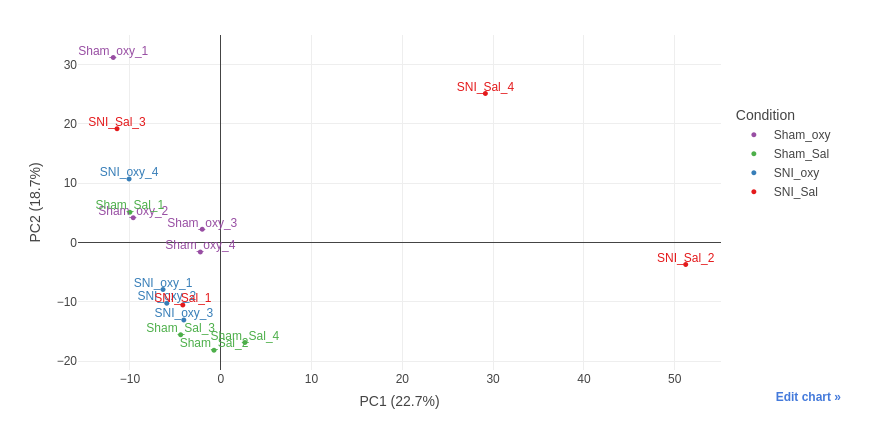

SNI-Sal2 and 4 seem in the PC plot off. Maybe exclude them from the analysis

How many genes were differentially expressed in each contrast? Does this confirm what the paper mentions?

SNI_oxy versus SNI_Sal in Condition one up and 17 down regulated

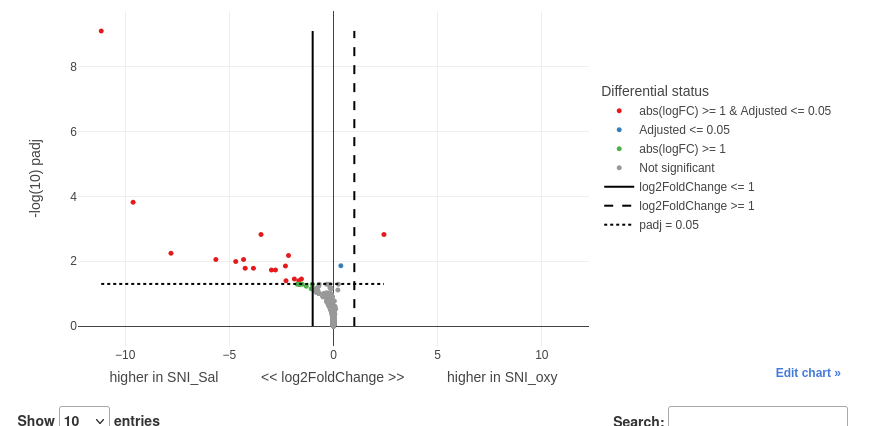


ham_oxy versus Sham_Sal in Condition 7 up regulated


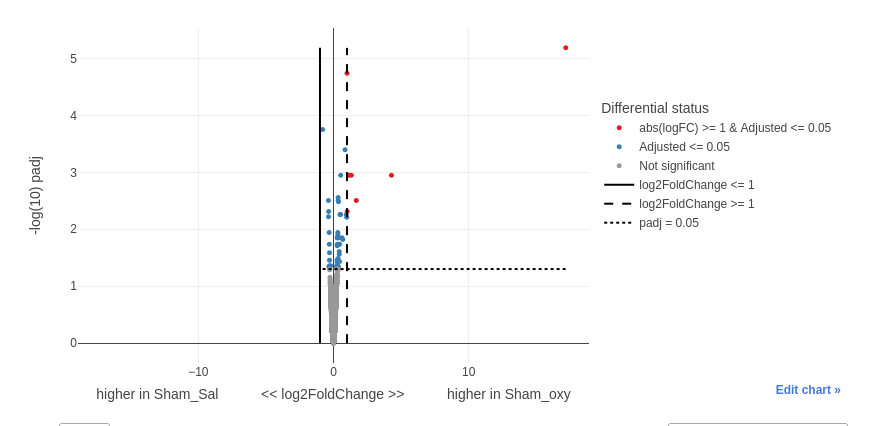

The paper mentions differentially expressed genes in three brain regions : the NAc, mPFC and VTA. Briefly explain what these 3 regions are.

NAc: Nucleus Accumbens
-part of ventral stratium 
-cenral reward system

mPFC: medial Prefrontal Cortex
-frontal lobe
-Important for addiction-related decision making

VTA: Ventral Tegmental Area
-midbrain
-dopaminierig neurons thatproject to NAc and mPFC
-drug reinforcements

Is there anyway from the paper and the material and methods for us to know which genes are included in these regions?

Yes in their fig4 the 3 regions are shown with the top regulated genes for both SNI and SHAM oxy vs sal ranked by p value (both up and down regualted)

Once you have your list of differentially expressed genes, do you think just communicating those to the biologists would be sufficient? What does the publication state?

YOu would need to further analyse if those genes have a functional meaning with a gsea for example

Please reproduce the Venn Diagram from Figure 3, not taking into account the brain regions but just the contrasts mentionned.